## Estimate number of cars per shift, per police district

Rough estimation based on district:
- population
- police employees
- number of cars
- staff per car

Use 11 cars for East district as a guiding number, as mentioned in public [news article](https://www.aftenposten.no/norge/i/kElo3A/politiets-operasjonsledere-mener-smertegrensen-for-antall-patruljer-er-naadd-kan-ikke-kalles-akutt-beredskap).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load csv
df = pd.read_csv('../data/Norway/district_data.csv')
df

,policeDistrict,population,policeEmployees,carsPatrol,carsTotal,policeAllPer1000,policePosPer1000,policePerCar
0,Finnmark,74472,469,54,82,6.30,4.00,5.5
1,Troms,166057,516,43,53,3.11,2.07,8.0
2,Nordland,239744,711,54,107,2.97,2.07,9.2
3,Trondelag,471667,1126,113,154,2.39,1.67,7.0
4,Inland,379374,948,89,157,2.50,1.74,7.4
5,MoreRomsdal,265086,619,51,89,2.34,1.65,8.6
6,West,594016,1385,116,195,2.33,1.59,8.2
7,SouthWest,527346,1235,70,148,2.34,1.59,12.0
8,Agder,306798,746,50,100,2.43,1.73,10.7
9,SouthEast,688962,1638,139,238,2.38,1.66,8.3


### Plot the variables

C:\Users\torha\AppData\Local\Temp\ipykernel_16940\3386928220.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['policeDistrict'], rotation=45)
C:\Users\torha\AppData\Local\Temp\ipykernel_16940\3386928220.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df['policeDistrict'], rotation=45)


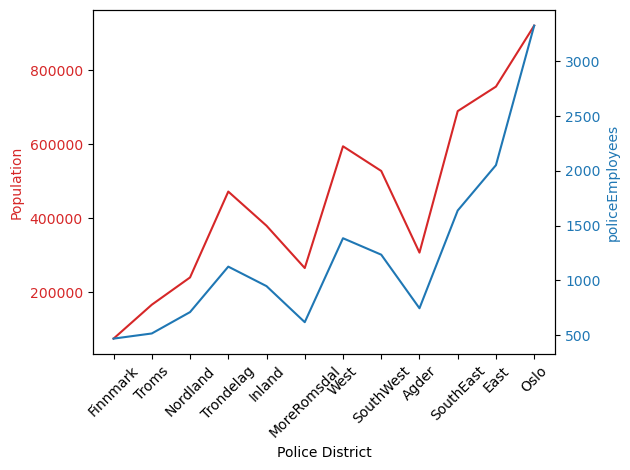

C:\Users\torha\AppData\Local\Temp\ipykernel_16940\3386928220.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['policeDistrict'], rotation=45)
C:\Users\torha\AppData\Local\Temp\ipykernel_16940\3386928220.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df['policeDistrict'], rotation=45)


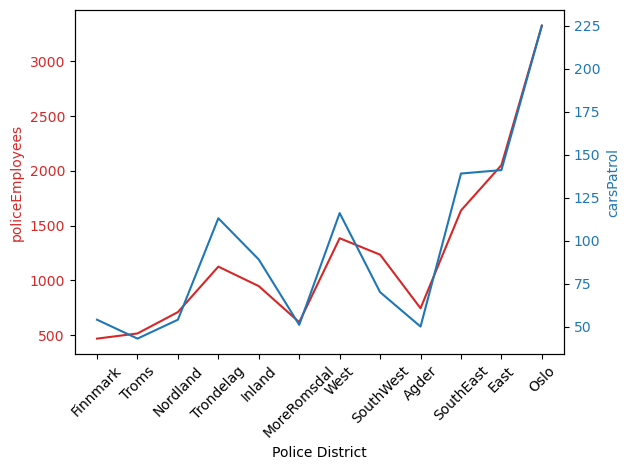

In [3]:
# plot a dual y axis with population and policeEmployees
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Police District')
ax1.set_ylabel('Population', color=color)
ax1.plot(df['policeDistrict'], df['population'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df['policeDistrict'], rotation=45)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('policeEmployees', color=color)
ax2.plot(df['policeDistrict'], df['policeEmployees'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticklabels(df['policeDistrict'], rotation=45)
fig.tight_layout(); plt.show()

# plot a dual y axis with the number of policeEmployees and carsPatrol
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Police District')
ax1.set_ylabel('policeEmployees', color=color)
ax1.plot(df['policeDistrict'], df['policeEmployees'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df['policeDistrict'], rotation=45)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('carsPatrol', color=color)
ax2.plot(df['policeDistrict'], df['carsPatrol'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticklabels(df['policeDistrict'], rotation=45)
fig.tight_layout(); plt.show()

### Derive new columns 

In [4]:
# extend the dataframe with new empty columns: popDeriv, empDeriv, carsDeriv, empCarCapDeriv, ownEstimate
df['popDeriv'] = np.nan
df['empDeriv'] = np.nan
df['carsDeriv'] = np.nan
df['empCarCapDeriv'] = np.nan
df['minCarsPerShift'] = np.nan

In [5]:
# Use 11.0 as a guiding value for the policeDistrict 'East' to derive the values for the new columns
# - popDeriv: population * 11.0 / population of policeDistrict 'East'
# - empDeriv: policeEmployees * 11.0 / policeEmployees of policeDistrict 'East'
# - carsDeriv: carsPatrol * 11.0 / carsPatrol of policeDistrict 'East'
# - empCarCapDeriv: policeEmployees / carsPatrol * 11.0 / (policeEmployees / carsPatrol of policeDistrict 'East')
# - minCarsPerShift: average of popDeriv, empDeriv, carsDeriv and empCarCapDeriv

df['popDeriv'] = df['population'] * 11.0 / df.loc[df['policeDistrict'] == 'East', 'population'].values[0]
df['empDeriv'] = df['policeEmployees'] * 11.0 / df.loc[df['policeDistrict'] == 'East', 'policeEmployees'].values[0]
df['carsDeriv'] = df['carsPatrol'] * 11.0 / df.loc[df['policeDistrict'] == 'East', 'carsPatrol'].values[0]
df['empCarCapDeriv'] = df['policeEmployees'] / df['carsPatrol'] * 11.0 / (df.loc[df['policeDistrict'] == 'East', 'policeEmployees'].values[0] / df.loc[df['policeDistrict'] == 'East', 'carsPatrol'].values[0])
df['minCarsPerShift'] = (df['popDeriv'] + df['empDeriv'] + df['carsDeriv'] + df['empCarCapDeriv']) / 4.0
df

,policeDistrict,population,policeEmployees,carsPatrol,carsTotal,policeAllPer1000,policePosPer1000,policePerCar,popDeriv,empDeriv,carsDeriv,empCarCapDeriv,minCarsPerShift
0,Finnmark,74472,469,54,82,6.30,4.00,5.5,1.084774,2.514133,4.212766,6.564679,3.594088
1,Troms,166057,516,43,53,3.11,2.07,8.0,2.418819,2.766082,3.354610,9.070175,4.402422
2,Nordland,239744,711,54,107,2.97,2.07,9.2,3.492159,3.811404,4.212766,9.951998,5.367082
3,Trondelag,471667,1126,113,154,2.39,1.67,7.0,6.870395,6.036062,8.815603,7.531724,7.313446
4,Inland,379374,948,89,157,2.50,1.74,7.4,5.526037,5.081871,6.943262,8.051055,6.400556
5,MoreRomsdal,265086,619,51,89,2.34,1.65,8.6,3.861295,3.318226,3.978723,9.173919,5.083041
6,West,594016,1385,116,195,2.33,1.59,8.2,8.652555,7.424464,9.049645,9.024564,8.537807
7,SouthWest,527346,1235,70,148,2.34,1.59,12.0,7.681427,6.620370,5.460993,13.335317,8.274527
8,Agder,306798,746,50,100,2.43,1.73,10.7,4.468881,3.999025,3.900709,11.277251,5.911467
9,SouthEast,688962,1638,139,238,2.38,1.66,8.3,10.035557,8.780702,10.843972,8.907043,9.641818


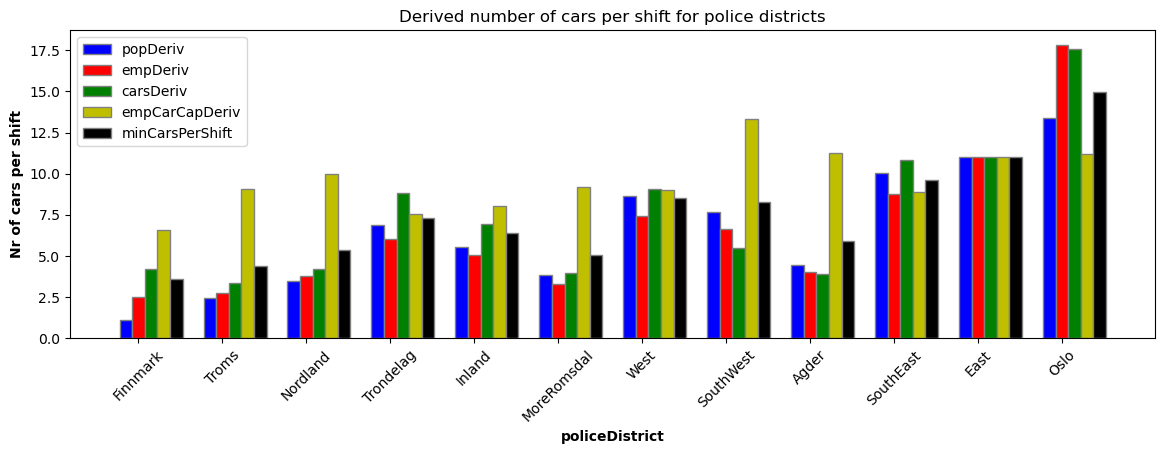

In [6]:
# plot the derived columns as a Grouped bar chart with labels
plt.figure(figsize=(14,4))
barWidth = 0.15
r1 = np.arange(len(df['popDeriv']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
plt.bar(r1, df['popDeriv'], color='b', width=barWidth, edgecolor='grey', label='popDeriv')
plt.bar(r2, df['empDeriv'], color='r', width=barWidth, edgecolor='grey', label='empDeriv')
plt.bar(r3, df['carsDeriv'], color='g', width=barWidth, edgecolor='grey', label='carsDeriv')
plt.bar(r4, df['empCarCapDeriv'], color='y', width=barWidth, edgecolor='grey', label='empCarCapDeriv')
plt.bar(r5, df['minCarsPerShift'], color='k', width=barWidth, edgecolor='grey', label='minCarsPerShift', zorder=10)
plt.xlabel('policeDistrict', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(df['popDeriv']))], df['policeDistrict'], rotation=45)

plt.ylabel('Nr of cars per shift', fontweight='bold')
plt.title('Derived number of cars per shift for police districts')
plt.legend(); plt.show()

In [7]:
# Final adjustments
# subtract 1.0 from the policeDistricts: Nordland, MoreRomsdal, SouthWest, Agder, Oslo
df.loc[df['policeDistrict'].isin(['Nordland', 'MoreRomsdal', 'SouthWest', 'Agder', 'Oslo']), 'minCarsPerShift'] -= 1.0
df

,policeDistrict,population,policeEmployees,carsPatrol,carsTotal,policeAllPer1000,policePosPer1000,policePerCar,popDeriv,empDeriv,carsDeriv,empCarCapDeriv,minCarsPerShift
0,Finnmark,74472,469,54,82,6.30,4.00,5.5,1.084774,2.514133,4.212766,6.564679,3.594088
1,Troms,166057,516,43,53,3.11,2.07,8.0,2.418819,2.766082,3.354610,9.070175,4.402422
2,Nordland,239744,711,54,107,2.97,2.07,9.2,3.492159,3.811404,4.212766,9.951998,4.367082
3,Trondelag,471667,1126,113,154,2.39,1.67,7.0,6.870395,6.036062,8.815603,7.531724,7.313446
4,Inland,379374,948,89,157,2.50,1.74,7.4,5.526037,5.081871,6.943262,8.051055,6.400556
5,MoreRomsdal,265086,619,51,89,2.34,1.65,8.6,3.861295,3.318226,3.978723,9.173919,4.083041
6,West,594016,1385,116,195,2.33,1.59,8.2,8.652555,7.424464,9.049645,9.024564,8.537807
7,SouthWest,527346,1235,70,148,2.34,1.59,12.0,7.681427,6.620370,5.460993,13.335317,7.274527
8,Agder,306798,746,50,100,2.43,1.73,10.7,4.468881,3.999025,3.900709,11.277251,4.911467
9,SouthEast,688962,1638,139,238,2.38,1.66,8.3,10.035557,8.780702,10.843972,8.907043,9.641818


In [8]:
# round minCarsPerShift to integer and convert to int
df['minCarsPerShift'] = df['minCarsPerShift'].round().astype(int)
df

,policeDistrict,population,policeEmployees,carsPatrol,carsTotal,policeAllPer1000,policePosPer1000,policePerCar,popDeriv,empDeriv,carsDeriv,empCarCapDeriv,minCarsPerShift
0,Finnmark,74472,469,54,82,6.30,4.00,5.5,1.084774,2.514133,4.212766,6.564679,4
1,Troms,166057,516,43,53,3.11,2.07,8.0,2.418819,2.766082,3.354610,9.070175,4
2,Nordland,239744,711,54,107,2.97,2.07,9.2,3.492159,3.811404,4.212766,9.951998,4
3,Trondelag,471667,1126,113,154,2.39,1.67,7.0,6.870395,6.036062,8.815603,7.531724,7
4,Inland,379374,948,89,157,2.50,1.74,7.4,5.526037,5.081871,6.943262,8.051055,6
5,MoreRomsdal,265086,619,51,89,2.34,1.65,8.6,3.861295,3.318226,3.978723,9.173919,4
6,West,594016,1385,116,195,2.33,1.59,8.2,8.652555,7.424464,9.049645,9.024564,9
7,SouthWest,527346,1235,70,148,2.34,1.59,12.0,7.681427,6.620370,5.460993,13.335317,7
8,Agder,306798,746,50,100,2.43,1.73,10.7,4.468881,3.999025,3.900709,11.277251,5
9,SouthEast,688962,1638,139,238,2.38,1.66,8.3,10.035557,8.780702,10.843972,8.907043,10


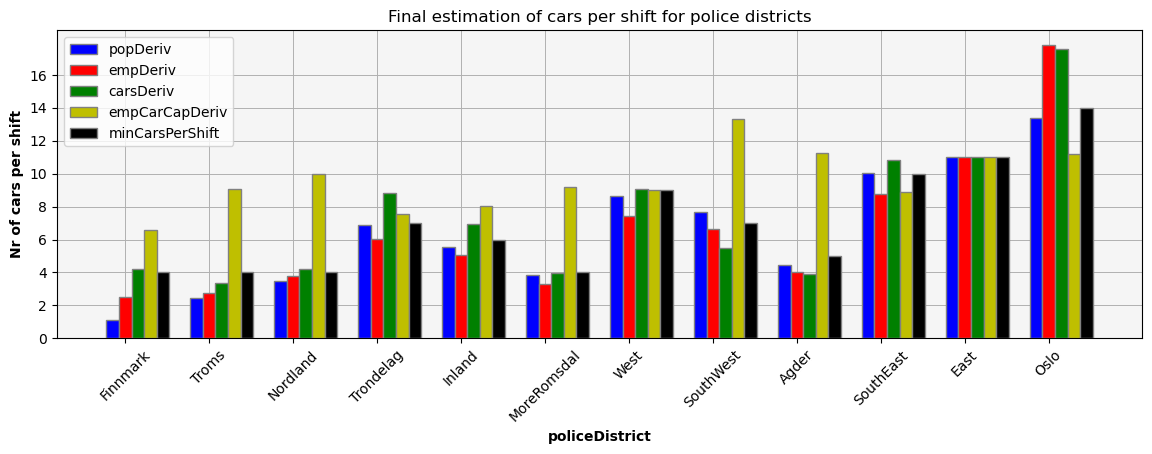

In [27]:
# plot the derived columns as a Grouped bar chart with labels
plt.figure(figsize=(14,4))
barWidth = 0.15
r1 = np.arange(len(df['popDeriv']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
plt.bar(r1, df['popDeriv'], color='b', width=barWidth, edgecolor='grey', label='popDeriv', zorder=10)
plt.bar(r2, df['empDeriv'], color='r', width=barWidth, edgecolor='grey', label='empDeriv', zorder=10)
plt.bar(r3, df['carsDeriv'], color='g', width=barWidth, edgecolor='grey', label='carsDeriv', zorder=10)
plt.bar(r4, df['empCarCapDeriv'], color='y', width=barWidth, edgecolor='grey', label='empCarCapDeriv', zorder=10)
plt.bar(r5, df['minCarsPerShift'], color='k', width=barWidth, edgecolor='grey', label='minCarsPerShift', zorder=10)
plt.xlabel('policeDistrict', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(df['popDeriv']))], df['policeDistrict'], rotation=45)

plt.ylabel('Nr of cars per shift', fontweight='bold')
plt.title('Final estimation of cars per shift for police districts')
plt.yticks(np.arange(0, 18, 2))
plt.grid(which='both', linewidth=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.legend(); plt.show()

In [9]:
# transpose and print policeDistrict and minCarsPerShift horizontally
df[['policeDistrict', 'minCarsPerShift']].T

,0,1,2,3,4,5,6,7,8,9,10,11
policeDistrict,Finnmark,Troms,Nordland,Trondelag,Inland,MoreRomsdal,West,SouthWest,Agder,SouthEast,East,Oslo
minCarsPerShift,4,4,4,7,6,4,9,7,5,10,11,14
